## Import dependencies

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler

## Get data

We load a dataset from a CSV file named creditcard.csv into a pandas DataFrame called data. The dataset contains information about credit card transactions.

In [49]:
# Load the dataset
data = pd.read_csv('data/creditcard.csv')

# Explore the dataset
# Print the first few rows of the dataset using the head() function. This gives us a quick overview of what the data looks like.
print(data.head())
# Print statistical information about the dataset using the describe() function. This includes measures like count, mean, standard deviation, minimum, and maximum values for each column.
print(data.describe())
# Print additional information about the dataset using the info() function. This tells us the number of non-null values in each column and the data types of the columns.
print(data.info())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

## Check for missing values

In [50]:
# Check for missing values in the dataset using the isnull() function, which returns a DataFrame of the same shape as data with True for missing values and False otherwise.
# Use the sum() function to calculate the total number of missing values for each column.
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


## Transformations

In [51]:
# Normalise the 'Amount' column of the dataset by subtracting the mean and dividing by the standard deviation.
data['NormalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
# Drop the 'Time' and 'Amount' columns from the dataset using the drop() function. These columns are not necessary for our analysis.
data = data.drop(['Time', 'Amount'], axis=1)

# Split the dataset into features (input variables) and labels (output variable).
X = data.drop('Class', axis=1)  # Features
y = data['Class']  # Labels


## Split data

In [52]:
# Split the data into training and testing sets using the train_test_split() function from scikit-learn.
# The parameter test_size=0.2 specifies that 20% of the data will be used for testing, while the remaining 80% will be used for training. 
# The random_state=1 parameter ensures reproducibility of the split, meaning that the same random split will be generated each time we run the code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Train Logistic Regression model

In [53]:
# Create an instance of the LogisticRegression class from scikit-learn, which represents a logistic regression model.
model = LogisticRegression()
# Train the model using the fit() method, providing the training features X_train and corresponding labels y_train.
model.fit(X_train, y_train)

LogisticRegression()

In [54]:
# Use the trained model to make predictions on the testing set by calling the predict() method with the testing features X_test. The predicted labels are stored in the variable y_pred.
y_pred = model.predict(X_test)

## Evaluate model

In [55]:
# Evaluate the performance of the model by printing the confusion matrix and the classification report.

# The confusion matrix, provides a summary of the predictions made by the model and their accuracy.
print(confusion_matrix(y_test, y_pred))
# The classification report, displays metrics such as precision, recall, and F1-score for each class (fraudulent and non-fraudulent) in the dataset.
print(classification_report(y_test, y_pred))

[[56865    10]
 [   39    48]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.83      0.55      0.66        87

    accuracy                           1.00     56962
   macro avg       0.91      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962



## Confusion Matrix

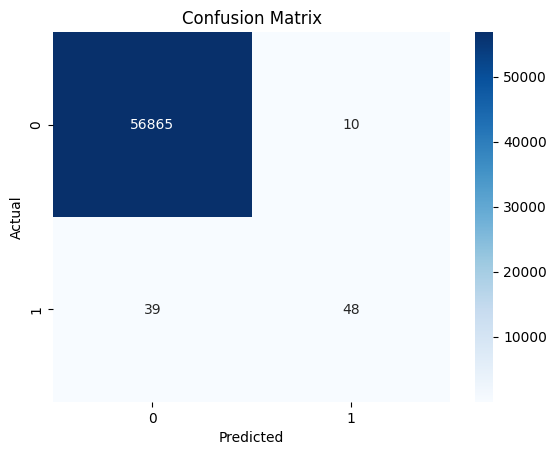

In [56]:
# Create a heatmap visualization of the confusion matrix using the confusion_matrix() function and seaborn's heatmap() function.
cm = confusion_matrix(y_test, y_pred)
# annot=True parameter adds the count values to the heatmap cells
# fmt='d' formats the counts as integers
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# Add titles and labels to the plot and display it using plt.show()
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## ROC curve and AUC

In [57]:

# Calculate the Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC)
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)


AUC: 0.9668013641530884


## ROC plot

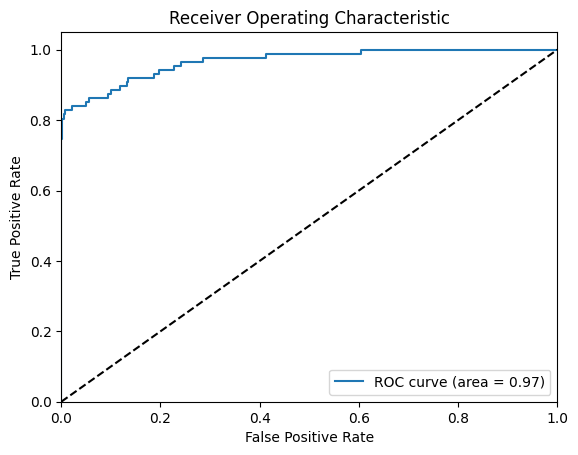

In [58]:
# ROC Curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
# The false positive rate (FPR) is plotted on the x-axis, and the true positive rate (TPR) is plotted on the y-axis.
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
